## Importing Model

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
from sklearn.metrics import confusion_matrix
! pip install -U imbalanced-learn

In [59]:
!wget https://gitlab.com/codeshells/modeling/-/raw/main/Heart_Disease.csv
url = "https://gitlab.com/codeshells/modeling/-/raw/main/Heart_Disease.csv"
df = pd.read_csv(url)


--2024-04-10 17:29:33--  https://gitlab.com/codeshells/modeling/-/raw/main/Heart_Disease.csv
Resolving gitlab.com (gitlab.com)... 172.65.251.78, 2606:4700:90:0:f22e:fbec:5bed:a9b9
Connecting to gitlab.com (gitlab.com)|172.65.251.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 81984258 (78M) [text/plain]
Saving to: ‘Heart_Disease.csv.1’

Heart_Disease.csv.1 100%[===================>]  78.19M   183MB/s    in 0.4s    

2024-04-10 17:29:34 (183 MB/s) - ‘Heart_Disease.csv.1’ saved [81984258/81984258]



In [60]:
df.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
1,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
2,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,...,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
3,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
4,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,No,...,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [61]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246022 entries, 0 to 246021
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      246022 non-null  object 
 1   Sex                        246022 non-null  object 
 2   GeneralHealth              246022 non-null  object 
 3   PhysicalHealthDays         246022 non-null  float64
 4   MentalHealthDays           246022 non-null  float64
 5   LastCheckupTime            246022 non-null  object 
 6   PhysicalActivities         246022 non-null  object 
 7   SleepHours                 246022 non-null  float64
 8   RemovedTeeth               246022 non-null  object 
 9   HadHeartAttack             246022 non-null  object 
 10  HadAngina                  246022 non-null  object 
 11  HadStroke                  246022 non-null  object 
 12  HadAsthma                  246022 non-null  object 
 13  HadSkinCancer              24

In [62]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

df_encoded = df.copy()

label_encoder = LabelEncoder()

for column in df_encoded.columns:
    if df_encoded[column].dtype == 'object':
        df_encoded[column] = label_encoder.fit_transform(df_encoded[column])



In [63]:
df_encoded.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,0,0,4,4.0,0.0,3,1,9.0,3,0,...,1.60,71.67,27.99,0,0,1,1,1,0,0
1,0,1,4,0.0,0.0,3,1,6.0,3,0,...,1.78,95.25,30.13,0,0,1,1,2,0,0
2,0,1,4,0.0,0.0,3,0,8.0,1,0,...,1.85,108.86,31.66,1,0,0,1,0,0,2
3,0,0,1,5.0,0.0,3,1,9.0,3,0,...,1.70,90.72,31.32,0,0,1,1,0,0,2
4,0,0,2,3.0,15.0,3,1,5.0,0,0,...,1.55,79.38,33.07,0,0,1,1,0,0,0


In [64]:
corr_matrix = df_encoded.corr()
had_heart_attack_corr = corr_matrix['HadHeartAttack']
had_heart_attack_corr_sorted = had_heart_attack_corr.sort_values()
print(had_heart_attack_corr_sorted)


PhysicalActivities          -0.083187
SmokerStatus                -0.077336
AlcoholDrinkers             -0.074181
RemovedTeeth                -0.073717
GeneralHealth               -0.021596
HighRiskLastYear            -0.021127
CovidPos                    -0.020962
ECigaretteUsage             -0.015477
HIVTesting                  -0.014563
State                       -0.002088
SleepHours                   0.003631
TetanusLast10Tdap            0.010010
HeightInMeters               0.023059
HadDepressiveDisorder        0.023706
HadAsthma                    0.023756
RaceEthnicityCategory        0.024201
MentalHealthDays             0.025892
BMI                          0.030413
WeightInKilograms            0.038436
FluVaxLast12                 0.045235
HadSkinCancer                0.049408
DifficultyConcentrating      0.051663
LastCheckupTime              0.065848
BlindOrVisionDifficulty      0.072964
Sex                          0.073316
DifficultyDressingBathing    0.083090
DifficultyEr

We Will take all the variable that has the coefficients larger than 0.05% or less than 0.05% which include: <br>
PhysicalActivities: -0.083187<br>
SmokerStatus: -0.077336<br>
AlcoholDrinkers: -0.074181<br>
RemovedTeeth: -0.073717<br>
DifficultyConcentrating: 0.051663<br>
LastCheckupTime: 0.065848<br>
BlindOrVisionDifficulty: 0.072964<br>
Sex: 0.073316<br>
DifficultyDressingBathing: 0.083090<br>
DifficultyErrands: 0.089495<br>
DeafOrHardOfHearing: 0.097662<br>
HadKidneyDisease: 0.109355<br>
HadArthritis: 0.117773<br>
PneumoVaxEver: 0.119955<br>
HadCOPD: 0.133223<br>
PhysicalHealthDays: 0.133420<br>
HadDiabetes: 0.135099<br>
DifficultyWalking: 0.159878<br>
ChestScan: 0.167760<br>
AgeCategory: 0.172172<br>
HadStroke: 0.177137<br>
HadAngina: 0.445903<br>
HadHeartAttack: 1.000000<br>
Total number of lines: 23

In [65]:
df = df[['PhysicalActivities', 'SmokerStatus', 'AlcoholDrinkers', 'RemovedTeeth',
         'DifficultyConcentrating', 'LastCheckupTime', 'BlindOrVisionDifficulty', 'Sex',
         'DifficultyDressingBathing', 'DifficultyErrands', 'DeafOrHardOfHearing',
         'HadKidneyDisease', 'HadArthritis', 'PneumoVaxEver', 'HadCOPD',
         'HadDiabetes', 'DifficultyWalking', 'ChestScan',
         'AgeCategory', 'HadStroke', 'HadAngina', 'HadHeartAttack', 'GeneralHealth','PhysicalHealthDays', 'MentalHealthDays', 'SleepHours', 'WeightInKilograms', 'BMI']]
df.head()

,PhysicalActivities,SmokerStatus,AlcoholDrinkers,RemovedTeeth,DifficultyConcentrating,LastCheckupTime,BlindOrVisionDifficulty,Sex,DifficultyDressingBathing,DifficultyErrands,...,AgeCategory,HadStroke,HadAngina,HadHeartAttack,GeneralHealth,PhysicalHealthDays,MentalHealthDays,SleepHours,WeightInKilograms,BMI
0,Yes,Former smoker,No,None of them,No,Within past year (anytime less than 12 months ...,No,Female,No,No,...,Age 65 to 69,No,No,No,Very good,4.0,0.0,9.0,71.67,27.99
1,Yes,Former smoker,No,None of them,No,Within past year (anytime less than 12 months ...,No,Male,No,No,...,Age 70 to 74,No,No,No,Very good,0.0,0.0,6.0,95.25,30.13
2,No,Former smoker,Yes,"6 or more, but not all",No,Within past year (anytime less than 12 months ...,Yes,Male,No,No,...,Age 75 to 79,No,No,No,Very good,0.0,0.0,8.0,108.86,31.66
3,Yes,Never smoked,No,None of them,No,Within past year (anytime less than 12 months ...,No,Female,No,No,...,Age 80 or older,No,No,No,Fair,5.0,0.0,9.0,90.72,31.32
4,Yes,Never smoked,No,1 to 5,No,Within past year (anytime less than 12 months ...,No,Female,No,No,...,Age 80 or older,No,No,No,Good,3.0,15.0,5.0,79.38,33.07


In [66]:
from sklearn.preprocessing import StandardScaler
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


In [67]:
df.head()

,PhysicalActivities,SmokerStatus,AlcoholDrinkers,RemovedTeeth,DifficultyConcentrating,LastCheckupTime,BlindOrVisionDifficulty,Sex,DifficultyDressingBathing,DifficultyErrands,...,AgeCategory,HadStroke,HadAngina,HadHeartAttack,GeneralHealth,PhysicalHealthDays,MentalHealthDays,SleepHours,WeightInKilograms,BMI
0,Yes,Former smoker,No,None of them,No,Within past year (anytime less than 12 months ...,No,Female,No,No,...,Age 65 to 69,No,No,No,Very good,-0.014160,-0.514292,1.373428,-0.560199,-0.104105
1,Yes,Former smoker,No,None of them,No,Within past year (anytime less than 12 months ...,No,Male,No,No,...,Age 70 to 74,No,No,No,Very good,-0.490020,-0.514292,-0.708924,0.545644,0.224420
2,No,Former smoker,Yes,"6 or more, but not all",No,Within past year (anytime less than 12 months ...,Yes,Male,No,No,...,Age 75 to 79,No,No,No,Very good,-0.490020,-0.514292,0.679311,1.183918,0.459300
3,Yes,Never smoked,No,None of them,No,Within past year (anytime less than 12 months ...,No,Female,No,No,...,Age 80 or older,No,No,No,Fair,0.104805,-0.514292,1.373428,0.333198,0.407105
4,Yes,Never smoked,No,1 to 5,No,Within past year (anytime less than 12 months ...,No,Female,No,No,...,Age 80 or older,No,No,No,Good,-0.133125,1.336949,-1.403041,-0.198619,0.675759


In [68]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

print(categorical_columns)

Index(['PhysicalActivities', 'SmokerStatus', 'AlcoholDrinkers', 'RemovedTeeth',
       'DifficultyConcentrating', 'LastCheckupTime', 'BlindOrVisionDifficulty',
       'Sex', 'DifficultyDressingBathing', 'DifficultyErrands',
       'DeafOrHardOfHearing', 'HadKidneyDisease', 'HadArthritis',
       'PneumoVaxEver', 'HadCOPD', 'HadDiabetes', 'DifficultyWalking',
       'ChestScan', 'AgeCategory', 'HadStroke', 'HadAngina', 'HadHeartAttack',
       'GeneralHealth'],
      dtype='object')


In [69]:
df['HadStroke'].unique()

array(['No', 'Yes'], dtype=object)

In [70]:
df['ChestScan'].unique()

array(['No', 'Yes'], dtype=object)

In [71]:
df['DifficultyWalking'].unique()

array(['No', 'Yes'], dtype=object)

In [72]:
df['HadDiabetes'].unique()

array(['No', 'Yes', 'Yes, but only during pregnancy (female)',
       'No, pre-diabetes or borderline diabetes'], dtype=object)

In [73]:
df['HadDiabetes'] = df['HadDiabetes'].replace({
    'No': 0,
    'Yes': 1,
    'Yes, but only during pregnancy (female)': 1,
    'No, pre-diabetes or borderline diabetes': 0
})


In [74]:
df['HadCOPD'].unique()

array(['No', 'Yes'], dtype=object)

In [75]:
df['PneumoVaxEver'].unique()

array(['Yes', 'No'], dtype=object)

In [76]:
df['HadKidneyDisease'].unique()

array(['No', 'Yes'], dtype=object)

In [77]:
df['DeafOrHardOfHearing'].unique()

array(['No', 'Yes'], dtype=object)

In [78]:
df['DifficultyErrands'].unique()

array(['No', 'Yes'], dtype=object)

In [79]:
df['DifficultyDressingBathing'].unique()

array(['No', 'Yes'], dtype=object)

In [80]:
df['Sex'].unique()

array(['Female', 'Male'], dtype=object)

In [81]:
df['Sex'] = df['Sex'].replace({
    'Female': 0,
    'Male': 1
})


In [82]:
df['BlindOrVisionDifficulty'].unique()

array(['No', 'Yes'], dtype=object)

In [83]:
df['LastCheckupTime'].unique()

array(['Within past year (anytime less than 12 months ago)',
       '5 or more years ago',
       'Within past 2 years (1 year but less than 2 years ago)',
       'Within past 5 years (2 years but less than 5 years ago)'],
      dtype=object)

In [84]:
df['LastCheckupTime'] = df['LastCheckupTime'].replace({
    'Within past year (anytime less than 12 months ago)': 0,
    'Within past 2 years (1 year but less than 2 years ago)': 1,
    'Within past 5 years (2 years but less than 5 years ago)': 2,
    '5 or more years ago': 3
})


In [85]:
df['DifficultyConcentrating'].unique()

array(['No', 'Yes'], dtype=object)

In [86]:
df['RemovedTeeth'].unique()

array(['None of them', '6 or more, but not all', '1 to 5', 'All'],
      dtype=object)

In [87]:
df['RemovedTeeth'] = df['RemovedTeeth'].replace({
    'None of them': 0,
    '1 to 5': 1,
    '6 or more, but not all': 2,
    'All': 3
})

In [88]:
df['AlcoholDrinkers'].unique()

array(['No', 'Yes'], dtype=object)

In [89]:
df['PhysicalActivities'].unique()

array(['Yes', 'No'], dtype=object)

In [90]:
df['HadHeartAttack'].unique()

array(['No', 'Yes'], dtype=object)

In [91]:
df['HadAngina'].unique()

array(['No', 'Yes'], dtype=object)

In [92]:
df['HadArthritis'].unique()

array(['Yes', 'No'], dtype=object)

In [93]:
df['HadAngina'] = df['HadAngina'].replace({'Yes': 1, 'No': 0})
df['HadArthritis'] = df['HadArthritis'].replace({'Yes': 1, 'No': 0})
df['HadHeartAttack'] = df['HadHeartAttack'].replace({'Yes': 1, 'No': 0})
df['PhysicalActivities'] = df['PhysicalActivities'].replace({'Yes': 1, 'No': 0})
df['AlcoholDrinkers'] = df['AlcoholDrinkers'].replace({'Yes': 1, 'No':0})
df['DifficultyConcentrating'] = df['DifficultyConcentrating'].replace({'Yes': 1, 'No':0})
df['BlindOrVisionDifficulty'] = df['BlindOrVisionDifficulty'].replace({'Yes': 1, 'No':0})
df['DifficultyDressingBathing'] = df['DifficultyDressingBathing'].replace({'Yes': 1, 'No':0})
df['DifficultyErrands'] = df['DifficultyErrands'].replace({'Yes': 1, 'No':0})
df['DeafOrHardOfHearing'] = df['DeafOrHardOfHearing'].replace({'Yes': 1, 'No':0})
df['HadKidneyDisease'] = df['HadKidneyDisease'].replace({'Yes': 1, 'No':0})
df['PneumoVaxEver'] = df['PneumoVaxEver'].replace({'Yes': 1, 'No':0})
df['HadCOPD'] = df['HadCOPD'].replace({'Yes': 1, 'No':0})
df['DifficultyWalking'] = df['DifficultyWalking'].replace({'Yes': 1, 'No':0})
df['ChestScan'] = df['ChestScan'].replace({'Yes': 1, 'No':0})
df['HadStroke'] = df['HadStroke'].replace({'Yes': 1, 'No':0})

In [94]:
df['SmokerStatus'].unique()

array(['Former smoker', 'Never smoked',
       'Current smoker - now smokes every day',
       'Current smoker - now smokes some days'], dtype=object)

In [95]:
df.replace({'SmokerStatus': {'Former smoker': 1,
                             'Never smoked': 0,
                             'Current smoker - now smokes every day': 3,
                             'Current smoker - now smokes some days': 2}}, inplace=True)


In [96]:
df['GeneralHealth'].unique()

array(['Very good', 'Fair', 'Good', 'Excellent', 'Poor'], dtype=object)

In [97]:
df.replace({'GeneralHealth': {'Very good': 3,
                              'Excellent': 4,
                              'Good': 2,
                              'Fair': 1,
                              'Poor': 0}}, inplace=True)


In [98]:
df['AgeCategory'].unique()

array(['Age 65 to 69', 'Age 70 to 74', 'Age 75 to 79', 'Age 80 or older',
       'Age 50 to 54', 'Age 40 to 44', 'Age 60 to 64', 'Age 55 to 59',
       'Age 45 to 49', 'Age 35 to 39', 'Age 25 to 29', 'Age 30 to 34',
       'Age 18 to 24'], dtype=object)

In [99]:
df.replace({'AgeCategory': {'Age 18 to 24': 0,
                             'Age 25 to 29': 1,
                             'Age 30 to 34': 2,
                             'Age 35 to 39': 3,
                             'Age 40 to 44': 4,
                             'Age 45 to 49': 5,
                             'Age 50 to 54': 6,
                             'Age 55 to 59': 7,
                             'Age 60 to 64': 8,
                             'Age 65 to 69': 9,
                             'Age 70 to 74': 10,
                             'Age 75 to 79': 11,
                             'Age 80 or older': 12}}, inplace=True)


In [100]:
df.columns

Index(['PhysicalActivities', 'SmokerStatus', 'AlcoholDrinkers', 'RemovedTeeth',
       'DifficultyConcentrating', 'LastCheckupTime', 'BlindOrVisionDifficulty',
       'Sex', 'DifficultyDressingBathing', 'DifficultyErrands',
       'DeafOrHardOfHearing', 'HadKidneyDisease', 'HadArthritis',
       'PneumoVaxEver', 'HadCOPD', 'HadDiabetes', 'DifficultyWalking',
       'ChestScan', 'AgeCategory', 'HadStroke', 'HadAngina', 'HadHeartAttack',
       'GeneralHealth', 'PhysicalHealthDays', 'MentalHealthDays', 'SleepHours',
       'WeightInKilograms', 'BMI'],
      dtype='object')

In [101]:
X = df.drop(['HadHeartAttack'], axis = 1)
y = df['HadHeartAttack']

In [102]:
y.value_counts()

HadHeartAttack
0    232587
1     13435
Name: count, dtype: int64

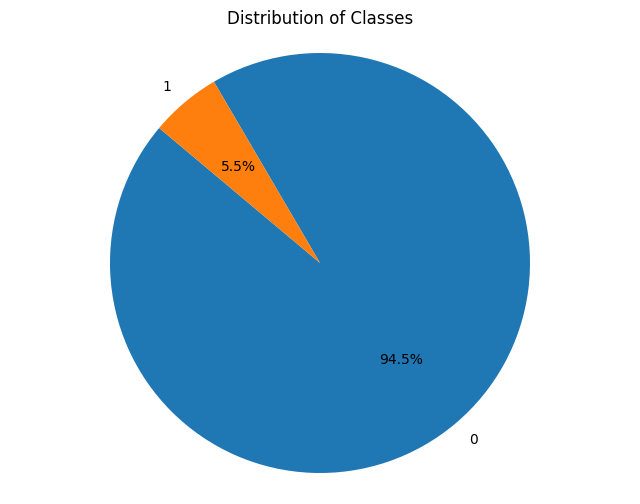

In [103]:
import matplotlib.pyplot as plt

class_counts = y.value_counts()

plt.figure(figsize=(8, 6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Classes')
plt.axis('equal')
plt.show()


Peform under sampling

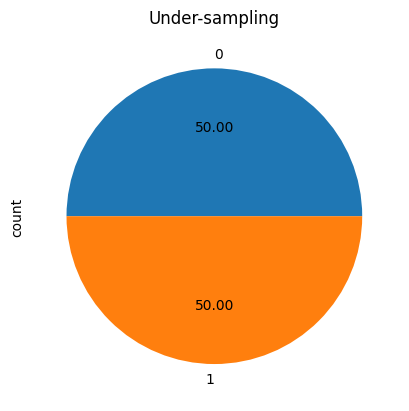

In [104]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy=1)
X_res, y_res = rus.fit_resample(X, y)

ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Under-sampling")

In [105]:
y.value_counts()


HadHeartAttack
0    232587
1     13435
Name: count, dtype: int64

In [106]:
y_res.value_counts()

HadHeartAttack
0    13435
1    13435
Name: count, dtype: int64

In [107]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from imblearn.under_sampling import RandomUnderSampler

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

log_reg = LogisticRegression(solver='liblinear')

log_reg.fit(X_train, y_train)

y_train_pred = log_reg.predict(X_train)
y_test_pred = log_reg.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


Training Accuracy: 0.7996
Test Accuracy: 0.7978


In [108]:
X_train.columns

Index(['PhysicalActivities', 'SmokerStatus', 'AlcoholDrinkers', 'RemovedTeeth',
       'DifficultyConcentrating', 'LastCheckupTime', 'BlindOrVisionDifficulty',
       'Sex', 'DifficultyDressingBathing', 'DifficultyErrands',
       'DeafOrHardOfHearing', 'HadKidneyDisease', 'HadArthritis',
       'PneumoVaxEver', 'HadCOPD', 'HadDiabetes', 'DifficultyWalking',
       'ChestScan', 'AgeCategory', 'HadStroke', 'HadAngina', 'GeneralHealth',
       'PhysicalHealthDays', 'MentalHealthDays', 'SleepHours',
       'WeightInKilograms', 'BMI'],
      dtype='object')

In [109]:
from sklearn.metrics import classification_report

y_train_pred = log_reg.predict(X_train)

print("Training Classification Report:")
print(classification_report(y_train, y_train_pred))

y_test_pred = log_reg.predict(X_test)

print("\nTesting Classification Report:")
print(classification_report(y_test, y_test_pred))


Training Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.83      0.81      9417
           1       0.82      0.77      0.79      9392

    accuracy                           0.80     18809
   macro avg       0.80      0.80      0.80     18809
weighted avg       0.80      0.80      0.80     18809


Testing Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.84      0.80      4018
           1       0.82      0.76      0.79      4043

    accuracy                           0.80      8061
   macro avg       0.80      0.80      0.80      8061
weighted avg       0.80      0.80      0.80      8061



In [110]:
X_res.columns

Index(['PhysicalActivities', 'SmokerStatus', 'AlcoholDrinkers', 'RemovedTeeth',
       'DifficultyConcentrating', 'LastCheckupTime', 'BlindOrVisionDifficulty',
       'Sex', 'DifficultyDressingBathing', 'DifficultyErrands',
       'DeafOrHardOfHearing', 'HadKidneyDisease', 'HadArthritis',
       'PneumoVaxEver', 'HadCOPD', 'HadDiabetes', 'DifficultyWalking',
       'ChestScan', 'AgeCategory', 'HadStroke', 'HadAngina', 'GeneralHealth',
       'PhysicalHealthDays', 'MentalHealthDays', 'SleepHours',
       'WeightInKilograms', 'BMI'],
      dtype='object')

In [111]:
def predict_new_values(new_data, log_reg, scaler):

    numerical_cols = new_data.select_dtypes(include=['float64', 'int64']).columns
    new_data[numerical_cols] = scaler.transform(new_data[numerical_cols])


    predictions = log_reg.predict(new_data)

    return predictions


In [112]:
import pandas as pd

def predict_probabilities(new_data, log_reg, scaler):
    numerical_cols = ['PhysicalHealthDays', 'MentalHealthDays', 'SleepHours', 'WeightInKilograms', 'BMI']
    new_data[numerical_cols] = scaler.transform(new_data[numerical_cols])
    probabilities = log_reg.predict_proba(new_data)[:, 1]
    probabilities_rounded = [round(prob, 2) for prob in probabilities]
    return probabilities_rounded


In [113]:
new_data_sample = pd.DataFrame({
    'PhysicalActivities': [1, 0],
    'SmokerStatus': [0, 1],
    'AlcoholDrinkers': [1, 1],
    'RemovedTeeth': [0, 0],
    'DifficultyConcentrating': [0, 1],
    'LastCheckupTime': [1, 0],
    'BlindOrVisionDifficulty': [0, 1],
    'Sex': [0, 1],
    'DifficultyDressingBathing': [0, 1],
    'DifficultyErrands': [0, 1],
    'DeafOrHardOfHearing': [1, 0],
    'HadKidneyDisease': [0, 1],
    'HadArthritis': [1, 0],
    'PneumoVaxEver': [1, 0],
    'HadCOPD': [0, 1],
    'HadDiabetes': [1, 0],
    'DifficultyWalking': [2, 1],
    'ChestScan': [0, 1],
    'AgeCategory': [5, 8],
    'HadStroke': [0, 1],
    'HadAngina': [1, 0],
    'GeneralHealth': [2, 3],
    'PhysicalHealthDays': [5, 4],
    'MentalHealthDays': [1, 2],
    'SleepHours': [7, 6],
    'WeightInKilograms': [70.0, 85.0],
    'BMI': [22.0, 27.5]
})


In [114]:
predict_probabilities(new_data_sample, log_reg, scaler)

[0.65, 0.73]

**PhysicalActivities:** <br>
Whether the individual engages in physical activities. Encoded as 0 (No) or 1 (Yes).<br>
**SmokerStatus:**<br> The smoking status of the individual. Encoded as 0 (Never smoked), 1 (Former smoker), 2 (Current smoker - now smokes some days), 3 (Current smoker - now smokes every day).<br>
**AlcoholDrinkers:**<br> Whether the individual consumes alcohol. Encoded as 0 (No) or 1 (Yes).<br>
**RemovedTeeth:**<br> The status of teeth removal. Encoded differently, possibly indicating the number or condition of teeth removed.<br>
**DifficultyConcentrating:**<br> Whether the individual has difficulty concentrating. Encoded as 0 (No) or 1 (Yes).<br>
**LastCheckupTime:**<br> Indicates the last time the individual had a medical checkup. Encoded numerically to represent different time frames.<br>
**BlindOrVisionDifficulty:**<br> Whether the individual has blindness or difficulty seeing. Encoded as 0 (No) or 1 (Yes).<br>
**Sex:**<br> The sex of the individual. Typically encoded as 0 (Female) or 1 (Male).<br>
**DifficultyDressingBathing:**<br> Whether the individual has difficulty dressing or bathing. Encoded as 0 (No) or 1 (Yes).<br>
**DifficultyErrands:**<br> Whether the individual has difficulty running errands alone. Encoded as 0 (No) or 1 (Yes).<br>
**DeafOrHardOfHearing:**<br> Whether the individual is deaf or has difficulty hearing. Encoded as 0 (No) or 1 (Yes).<br>
**HadKidneyDisease:**<br> Whether the individual has had kidney disease. Encoded as 0 (No) or 1 (Yes).<br>
**HadArthritis:**<br> Whether the individual has arthritis. Encoded as 0 (No) or 1 (Yes).<br>
**PneumoVaxEver:**<br> Whether the individual has ever received a pneumococcal vaccine. Encoded as 0 (No) or 1 (Yes).<br>
**HadCOPD:**<br> Whether the individual has COPD (Chronic Obstructive Pulmonary Disease). Encoded as 0 (No) or 1 (Yes).<br>
**HadDiabetes:**<br> Whether the individual has diabetes. Encoded as 0 (No) or 1 (Yes).<br>
**DifficultyWalking:**<br> Whether the individual has difficulty walking. Encoded as 0 (No) or 1 (Yes).<br>
**ChestScan:**<br> Whether the individual has undergone a chest scan. Encoded as 0 (No) or 1 (Yes).<br>
**AgeCategory:**<br>The age category of the individual. Encoded numerically to represent different age ranges.<br>
**HadStroke:** <br>Whether the individual has had a stroke. Encoded as 0 (No) or 1 (Yes).<br>
**HadAngina:** <br>Whether the individual has had angina. Encoded as 0 (No) or 1 (Yes).<br>
**GeneralHealth:** <br>The general health condition of the individual. Encoded as 0 (Poor), 1 (Fair), 2 (Good), 3 (Very good), 4 (Excellent).<br>
**PhysicalHealthDays:** <br>The number of days in poor physical health in the last month. Encoded numerically.<br>
**MentalHealthDays:** <br>The number of days in poor mental health in the last month. Encoded numerically.<br>
**SleepHours:** <br>The average number of hours the individual sleeps. Encoded numerically.<br>
**WeightInKilograms:** <br>The weight of the individual in kilograms. Encoded numerically.<br>
**BMI:** <br>The Body Mass Index of the individual. Encoded numerically.<br>